# Tornado Impact - Data Exploration and Cleanup

**Authors:**

* Andrea Johnson
* Damir Zunic
* Lindsey Downs
* Christian Odueme

## Data Source

In this research we are using publicly available [NCEI (Storm Events Database](https://www.ncdc.noaa.gov/stormevents/ftp.jsp). It contains various types of storms from January 1950 to December 2019, entered by NOAA's National Weather Service (NWS). Data are available in comma-separated value (CSV) files, three files per year: "details", "locations" and "fatalities".

In our research we will be using only "details" files from 1996 to 2019.

**Description of Features:**

The full description of 51 features is available in the [following document](http://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Export-Format.docx). In the Storm Events Database 48 meteorological events are reported.

The subject of our project are tornadoes so we will extract only tornado events from the data.
We are going to reduce the number of features to 14 following features:


|Feature Name|Description|
|---|---|
|EVENT_ID|ID assigned by NWS to note a single, small part of a storm episode|
|STATE|The state name where the event occurred|
|YEAR|Four digit year for the event in this record|
|MONTH_NAME|Name of the month for the event in this record|
|BEGIN_DATE_TIME|Beginning  of the eventMM/DD/YYYY 24 hour time AM/PM|
|INJURIES_DIRECT|The number of injuries directly related to the weather event|
|INJURIES_INDIRECT|The number of injuries indirectly related to the weather event|
|DEATHS_DIRECT|The number of deaths directly related to the weather event|
|DEATHS_INDIRECT|The number of deaths indirectly related to the weather event|
|DAMAGE_PROPERTY|The estimated amount of damage to property|
|DAMAGE_CROPS|The estimated amount of damage to crops|
|TOR_F_SCALE|The strength of the tornado on Enhanced Fujita Scale|
|BEGIN_LAT|The latitude where the event occurred|
|BEGIN_LON|The longitude where the event occurred|


After loading data in all files and joining all dataframes, we will reduce the number of features by merging two "injuries" features into one feature. We will do the same with "deaths" and "damage" features.




## Library Imports

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set max number of columns to be displayed
pd.set_option('display.max_columns', 60)

**Next cell loops through the .csv files and does the following in each iteration:**

* Reads only listed columns from a file and creates a dataframe.

* Selects only tornado events and then drops EVENT_TYPE column.

* Counts number of rows with EFU tornadoes and deletes them.

* Merges "injuries" columns into one and drops the old ones.

* Merges "deaths" columns into one and drops the old ones.

* Converts string values in "damages" columns to floats. After that merges both columns into one and drops the old ones.

* Joins a new dataframe to the dataframe created in previous iterations.


In [3]:
# Initialize dataframe
df_full = pd.DataFrame()

# Loop through all .csv files
for file_name in glob.glob('./Storm_Event_Database/StormEvents_details*.csv'):
    
    shortf = file_name.split('\\')[1]
    print(f"Working on file {shortf}\n--------------------------------------------")
          
    # load the initial dataset, only needed columns
    # cols = [7, 8, 10, 11, 12, 17, 20, 21, 22, 23, 24, 25, 31, 44, 45]
    # using column names instead of indexes in case order is not the same in all files
    cols = ['EVENT_ID', 'STATE', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'BEGIN_DATE_TIME', 
            'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 
            'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'TOR_F_SCALE', 'BEGIN_LAT', 'BEGIN_LON']
    df_raw = pd.read_csv(file_name, usecols=cols)

    # Select tornado events only
    df_tor = df_raw.loc[df_raw.EVENT_TYPE == 'Tornado', :]
    # Now we can drop EVENT_TYPE column 
    df_tor = df_tor.drop(columns='EVENT_TYPE') 

    # Calculate number of EFU events
    efus = df_tor.loc[df_tor['TOR_F_SCALE'] == 'EFU'].EVENT_ID.count()
    print(f"Number of EFU tornadoes: {efus}")
    # Drop EFUs
    df_tor = df_tor.loc[df_tor['TOR_F_SCALE'] != 'EFU']

    # Merge injuries
    df_tor['INJURIES'] = df_tor['INJURIES_DIRECT'] + df_tor['INJURIES_INDIRECT']
    df_tor = df_tor.drop(columns=['INJURIES_DIRECT', 'INJURIES_INDIRECT'])

    # Merge deaths
    df_tor['DEATHS'] = df_tor['DEATHS_DIRECT'] + df_tor['DEATHS_INDIRECT']
    df_tor = df_tor.drop(columns=['DEATHS_DIRECT', 'DEATHS_INDIRECT'])

    # Convert string damages to floats
    df_tor.DAMAGE_PROPERTY = df_tor.DAMAGE_PROPERTY.fillna(0).replace(
                {'K': '*1e3', 'M': '*1e6', 'B': '*1e9'},regex=True).map(pd.eval)
    df_tor.DAMAGE_CROPS = df_tor.DAMAGE_CROPS.fillna(0).replace(
                {'K': '*1e3', 'M': '*1e6', 'B': '*1e9'},regex=True).map(pd.eval)

    # Merge converted damages
    df_tor['DAMAGE'] = df_tor.DAMAGE_PROPERTY + df_tor.DAMAGE_CROPS
    df_tor = df_tor.drop(columns=['DAMAGE_PROPERTY', 'DAMAGE_CROPS'])

    print(f"Dimensions of {shortf}: {df_tor.shape}")
    
    # Joined dataframes
    df_full = pd.concat([df_full, df_tor]).reset_index(drop=True)
    print(f"Dimensions of concatenated dataframe: {df_full.shape}")
    print("============================================\n")

Working on file StormEvents_details-ftp_v1.0_d1996.csv
--------------------------------------------
Number of EFU tornadoes: 0
Dimensions of StormEvents_details-ftp_v1.0_d1996.csv: (1267, 11)
Dimensions of concatenated dataframe: (1267, 11)

Working on file StormEvents_details-ftp_v1.0_d1997.csv
--------------------------------------------
Number of EFU tornadoes: 0
Dimensions of StormEvents_details-ftp_v1.0_d1997.csv: (1180, 11)
Dimensions of concatenated dataframe: (2447, 11)

Working on file StormEvents_details-ftp_v1.0_d1998.csv
--------------------------------------------
Number of EFU tornadoes: 0
Dimensions of StormEvents_details-ftp_v1.0_d1998.csv: (1529, 11)
Dimensions of concatenated dataframe: (3976, 11)

Working on file StormEvents_details-ftp_v1.0_d1999.csv
--------------------------------------------
Number of EFU tornadoes: 0
Dimensions of StormEvents_details-ftp_v1.0_d1999.csv: (1520, 11)
Dimensions of concatenated dataframe: (5496, 11)

Working on file StormEvents_deta

In [4]:
# Display dataframe
df_full.head()

,EVENT_ID,STATE,YEAR,MONTH_NAME,BEGIN_DATE_TIME,TOR_F_SCALE,BEGIN_LAT,BEGIN_LON,INJURIES,DEATHS,DAMAGE
0,5539021,MISSOURI,1996,January,18-JAN-96 08:05:00,F1,36.18,-89.87,0,0,50000.0
1,5535520,ARKANSAS,1996,January,18-JAN-96 07:30:00,F1,34.55,-90.97,3,0,30000.0
2,5574627,LOUISIANA,1996,January,26-JAN-96 09:35:00,F1,30.57,-92.32,3,0,15000.0
3,5558382,INDIANA,1996,January,18-JAN-96 14:30:00,F0,40.50,-86.97,0,0,0.0
4,5535845,TEXAS,1996,January,17-JAN-96 21:55:00,F2,33.72,-96.15,5,0,150000.0


In [5]:
# Display dataframe summary
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33006 entries, 0 to 33005
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EVENT_ID         33006 non-null  int64  
 1   STATE            33006 non-null  object 
 2   YEAR             33006 non-null  int64  
 3   MONTH_NAME       33006 non-null  object 
 4   BEGIN_DATE_TIME  33006 non-null  object 
 5   TOR_F_SCALE      33006 non-null  object 
 6   BEGIN_LAT        32968 non-null  float64
 7   BEGIN_LON        32968 non-null  float64
 8   INJURIES         33006 non-null  int64  
 9   DEATHS           33006 non-null  int64  
 10  DAMAGE           33006 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 2.8+ MB


In [6]:
# Statistics for numeric data
df_full.loc[:,['INJURIES', 'DEATHS', 'DAMAGE']].describe()

,INJURIES,DEATHS,DAMAGE
count,33006.000000,33006.000000,3.300600e+04
mean,0.755711,0.055141,1.080434e+06
std,11.009571,1.121327,2.572525e+07
min,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,2.000000e+03
75%,0.000000,0.000000,5.000000e+04
max,1150.000000,161.000000,2.800000e+09


In [7]:
# Statistics for non-numeric data
df_full.loc[:, df_full.columns != 'BEGIN_DATE_TIME'].describe(include=['object'])

,STATE,MONTH_NAME,TOR_F_SCALE
count,33006,33006,33006
unique,53,12,12
top,TEXAS,May,F0
freq,3349,7300,9483


In [20]:
# Print number of oservations with some measurements of impact
dfl = len(df_full)

# Number of observations with some fatalities
deathl = len(df_full[df_full.DEATHS != 0 ])
print(f"Number of tornadoes with some fatalities: {deathl} of {dfl}")

# Number of observations with some injuries
injuriesl = len(df_full[df_full.INJURIES != 0 ])
print(f"Number of tornadoes with some injuries: {injuriesl} of {dfl}")

# Number of observations with some damages
damagel = len(df_full[df_full.DAMAGE != 0 ])
print(f"Number of tornadoes with some damages: {damagel} of {dfl}")

Number of tornadoes with some fatalities: 584 of 33006
Number of tornadoes with some injuries: 2464 of 33006
Number of tornadoes with some damages: 17343 of 33006


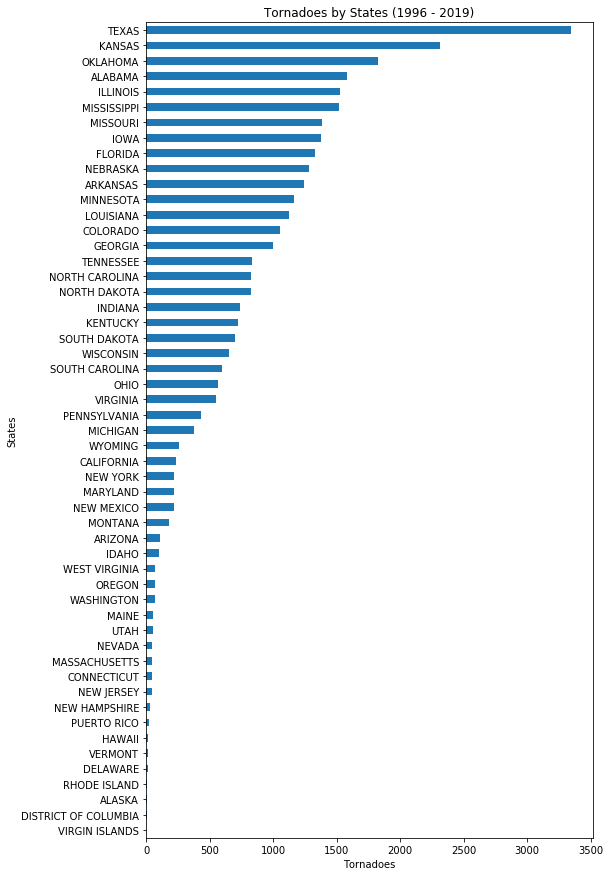

In [11]:
# Calculate number of tornadoes per state and plot
states = df_full.STATE.value_counts(ascending=True)

fig, ax = plt.subplots(figsize=(8, 15))
states.plot(kind='barh')

plt.title('Tornadoes by States (1996 - 2019)')
plt.ylabel('States')
plt.xlabel('Tornadoes')

plt.savefig('./Images/Tornadoes by State - Expl.')
plt.show()

In [9]:
# Calculate number of tornadoes per year
years = df_full.YEAR.value_counts().sort_index()
years

1996    1267
1997    1180
1998    1529
1999    1520
2000    1169
2001    1351
2002    1040
2003    1535
2004    1947
2005    1343
2006    1263
2007    1241
2008    1954
2009    1273
2010    1446
2011    2074
2012    1058
2013    1053
2014    1055
2015    1320
2016    1048
2017    1580
2018    1232
2019    1528
Name: YEAR, dtype: int64

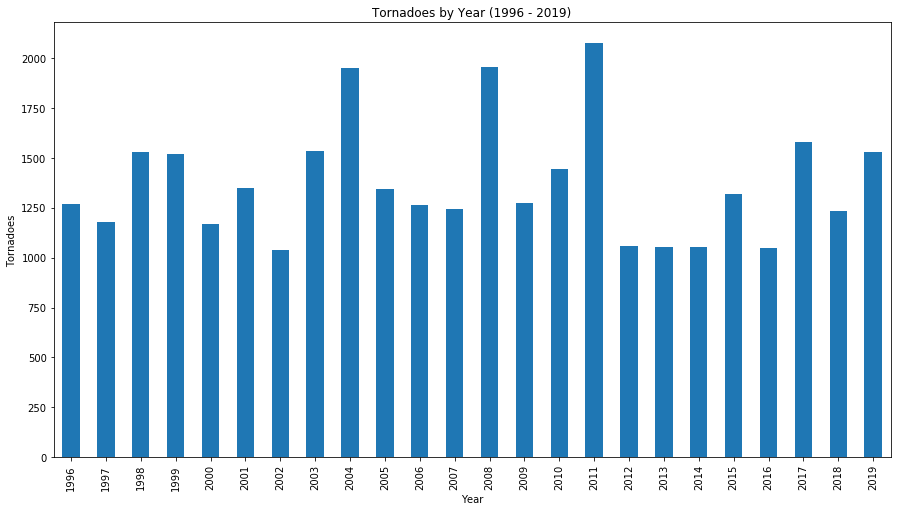

In [12]:
# Display number of tornadoes per year
fig, ax = plt.subplots(figsize=(15, 8))
years.plot(kind='bar')

plt.title('Tornadoes by Year (1996 - 2019)')
plt.xlabel('Year')
plt.ylabel('Tornadoes')

plt.savefig('./Images/Tornadoes by Year - Expl.')
plt.show()

In [71]:
# # Save the dataframe to csv file
# file_name = f"./Resources/TornadoEvents.csv"
# df_full.to_csv(file_name, index=False)